In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

import plotly as py
from plotly.offline import init_notebook_mode, iplot, plot 
init_notebook_mode(connected=True)
import plotly.graph_objs as go
# from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [19]:
happy2019 = pd.read_csv('2019.csv')
happy2018 = pd.read_csv('2018.csv')
happy2017 = pd.read_csv('2017.csv')
happy2016 = pd.read_csv('2016.csv')
happy2015 = pd.read_csv('2015.csv')
happy2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [43]:

# найдем среднее значение параметров score, gdp per capicta и freedom для каждого года 
#(они встречатся во всех отчетах) и составим отдельный датафрейм

df2015_score = round((happy2015['Happiness Score'].mean()),2)
df2016_score = round((happy2016['Happiness Score'].mean()),2)
df2017_score = round((happy2017['Happiness.Score'].mean()),2)
df2018_score = round((happy2018['Score'].mean()),2)
df2019_score = round((happy2019['Score'].mean()),2)


df2015_gdp = round((happy2015['Economy (GDP per Capita)'].mean()),2)
df2016_gdp = round((happy2016['Economy (GDP per Capita)'].mean()),2)
df2017_gdp = round((happy2017['Economy..GDP.per.Capita.'].mean()),2)
df2018_gdp = round((happy2018['GDP per capita'].mean()),2)
df2019_gdp = round((happy2019['GDP per capita'].mean()),2)


df2015_freedom = round((happy2015['Freedom'].mean()),2)
df2016_freedom = round((happy2016['Freedom'].mean()),2)
df2017_freedom = round((happy2017['Freedom'].mean()),2)
df2018_freedom = round((happy2018['Freedom to make life choices'].mean()),2)
df2019_freedom = round((happy2019['Freedom to make life choices'].mean()),2)



metrics_per_year = pd.DataFrame({'year': [2015, 2016, 2017,2018,2019], 
                               'score': [df2015_score, df2016_score, df2017_score , df2018_score, df2019_score ], 
                                 'gdp': [df2015_gdp, df2016_gdp, df2017_gdp , df2018_gdp, df2019_gdp ], 
                                 'freedom': [df2015_freedom, df2016_freedom, df2017_freedom , df2018_freedom, df2019_freedom ]
                                })

metrics_per_year = metrics_per_year.set_index('year')
metrics_per_year.head()

,score,gdp,freedom
year,,,
2015,5.38,0.85,0.43
2016,5.38,0.95,0.37
2017,5.35,0.98,0.41
2018,5.38,0.89,0.45
2019,5.41,0.91,0.39


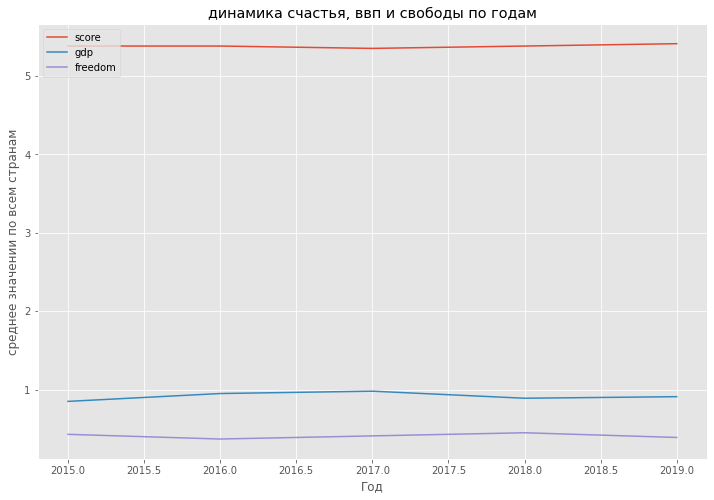

In [44]:
metrics_per_year.plot(title='динамика счастья, ввп и свободы по годам', 
                             xlabel='Год', 
                             ylabel='среднее значении по всем странам')

plt.legend(loc='upper left')


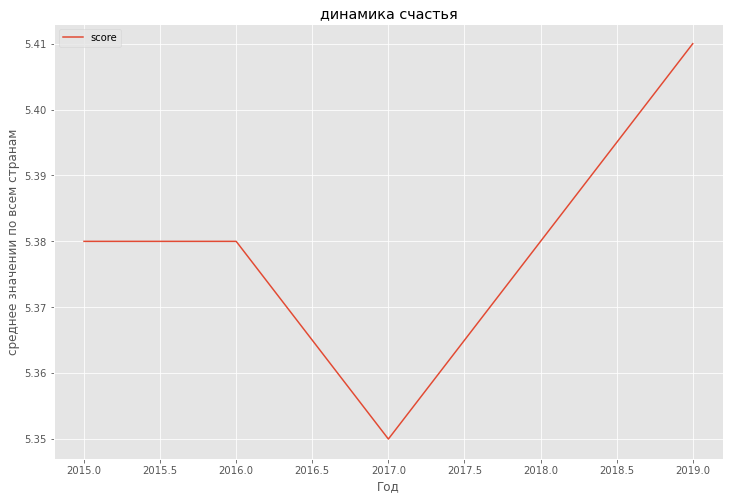

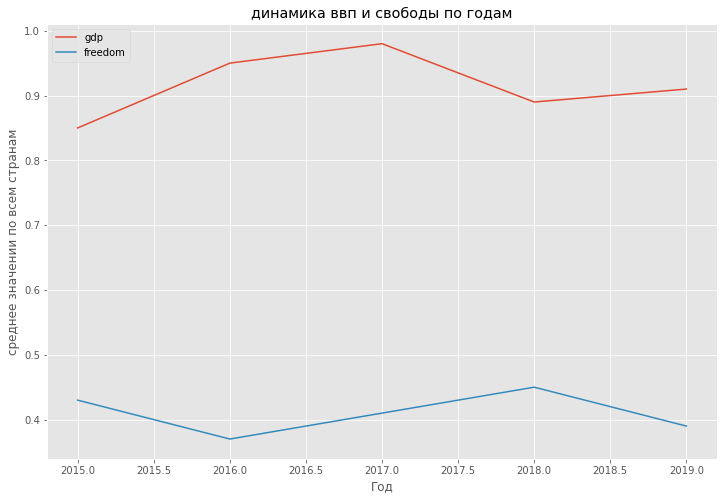

In [46]:
#не очень репрезентативно
metrics_per_year.score.plot(title='динамика счастья', 
                             xlabel='Год', 
                             ylabel='среднее значении по всем странам')

plt.legend(loc='upper left')
metrics_per_year[['gdp', 'freedom']].plot(title='динамика ввп и свободы по годам', 
                             xlabel='Год', 
                             ylabel='среднее значении по всем странам')

plt.legend(loc='upper left')

In [34]:
#получилось нерепрезентативно, попробуем бар чарты


<AxesSubplot:title={'center':'динамика ввп и свободы по годам'}, xlabel='среднее значении по всем странам', ylabel='Год'>

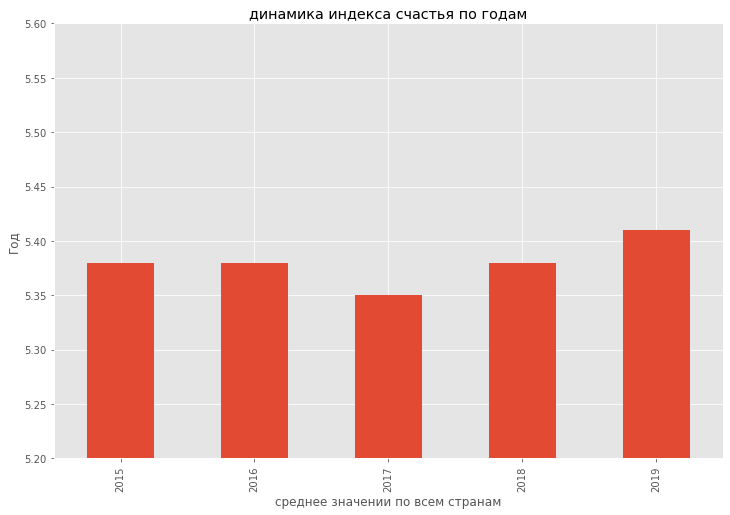

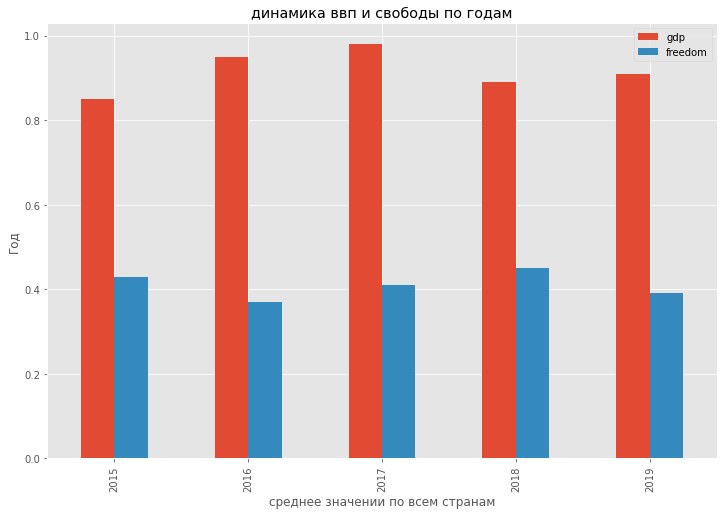

In [51]:

metrics_per_year.score.plot(kind='bar', 
                    title='динамика индекса счастья по годам', 
                    xlabel='среднее значении по всем странам',
                    ylabel='Год').set_ylim([5.2,5.6])

metrics_per_year[['gdp', 'freedom']].plot(kind='bar', 
                    title='динамика ввп и свободы по годам', 
                    xlabel='среднее значении по всем странам',
                    ylabel='Год')

In [7]:
#получилось совсем нерепрезентативно
#подргузим карты и посомтрим уровень счастья на ней.

data = dict(
        type = 'choropleth',
        colorscale = 'Viridis',
         marker_line_width=1,
        locations = happy2019['Country or region'],
        locationmode = "country names",
        z = happy2019['Score'],
        text = happy2019['Country or region'],
        colorbar = {'title' : 'Happiness Score'},
        
      )
layout = dict(title = 'Happiness Map',
              geo = dict(projection = {'type':'mercator'}, showocean = False, showlakes = True, showrivers = True, )
             )
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)

In [52]:
# здесь хотя бы можно выделить регионы
# так северная европа, австралия и северная америка определенно принадлежат к регионам с высоким ощущением счастья,
# а южная азия и центральная африка наоборот к регионам с низким показателем счастья 

<AxesSubplot:title={'center':'Корреляция между ощущением коррупции, продолжительностью жизни и конечным индексом'}, xlabel='Perceptions of corruption', ylabel='Healthy life expectancy'>

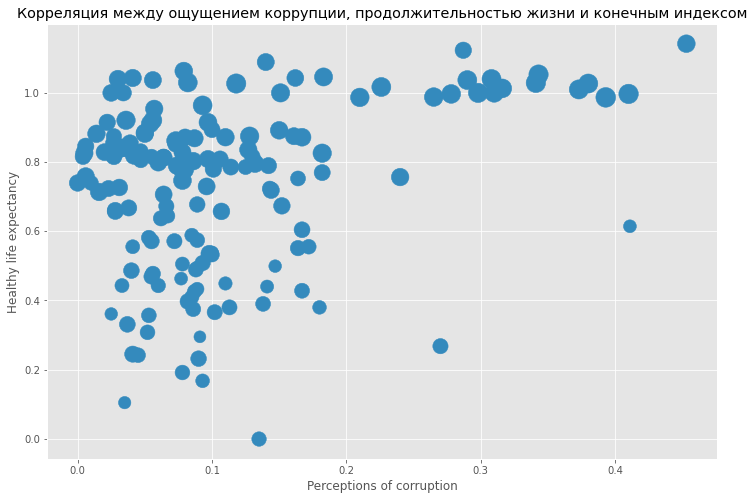

In [63]:
happy2019.plot(kind='scatter', 
        x='Perceptions of corruption', 
        y='Healthy life expectancy', 
        s=happy2019['Score']*50,
        title='Корреляция между ощущением коррупции, продолжительностью жизни и конечным индексом'
       )
#естественно в нижнем левом углу у нас оказались аутсайдеры
#(низкая продолжительность жизни и ощущение коррумпированности складываются в маленьку плозадь кружка)
# мы так же видим что ощущение коррумпированности меньше коррелирует с ощущением счастья чем продолжительность жизни 
# т.е. на ощущение счастья больше влияют показатели продолжительности жизни чем коррупировнность 
# также можно сказать, что за редким исключением 
# нет такой страны в которой была бы низкая корумпированнность и низкая продолжительность жизни

In [53]:
#попробуем бабл чарт, где осью х будет доверие к государству, осью у будет ощущение свободы,
# цветом бабла отображается продолжительность жизни, а его размером - показатель индекса счастья. 
data = [
    {
        'y': happy2019['Perceptions of corruption'],
        'x':happy2019['Freedom to make life choices'],
        'mode': 'markers',
        'marker': {
            'color': happy2019['Healthy life expectancy'],
            'size': happy2019['Score'],
            'showscale': True,
        },
        "text" :  happy2019['Country or region']

    }
]
layout = go.Layout(barmode='group', hovermode="x",
                   title='Bubble Chart: x = Freedom, y = Trust, size = Happiness Score, Color = Health, year = 2019',
                   xaxis=dict(title='Freedom'),
                   yaxis=dict(title='Trust'))

fig = go.Figure(data=data, layout=layout)
iplot(fig)


In [ ]:
# немного об исключениях: сингапур, который по сути является автораитарным 
# государством оказывается в лидерах по общущению доверия и свободы дейсвтий
# как и узбекистан, в котором люди ощущают себя свободными и доверяют друг дургу и попадает в первые 40 стран по уровню счастья
# Мы видим что доверие является определяющим факотором для сильного ощущения счастья. 
# т.е.  почти незавсимо от уровня ощущения свободы (страны примерно равномерно распределены вдоль оси х) 
# именно в тех странах люди ощущаютсебя счастливо где высоко довоерие между членами общества и доверие к государству
